In [24]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
import math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

In [8]:
prob15

0.6666666666666666

In [2]:
# a)
# Integrate f
u = sp.Symbol('u')
c = sp.Symbol('c')
x = sp.Symbol('x')

f = c*u**(-2)
integrate(f, (u,10, x))

c/10 - c/x

In [3]:
solve(c/10-c/float("inf")-(c/10-c/10)-1,c)

[10]

In [4]:
print("F(x) = 1-10/x")

F(x) = 1-10/x


In [5]:
# b)

def F(x):
    y = 1-10/x
    return y
print("P(X > 20) =", 1-F(20))

P(X > 20) = 0.5


In [6]:
# c)
print('E(X) = Undefined or "infinite"')

E(X) = Undefined or "infinite"


In [11]:
# d) Note. There is a small error in the assignment. It should be "in hours" and not "in days"
# You need to do this in two steps. 1) find the prob. for one device; 2) find the prob that at least 3 out of 6 will

# Find prob of 1 device
prob15 = 1-F(15)

# Now we can use the binomial case as this can now be seen as a success and we need at least 3 out of 6 successes:

prob = 1-binom.sf(2,6,prob15)
print('P(X \u2265', 3,') =' , round(prob,4))

P(X ≥ 3 ) = 0.8999


Assignment 2
==

In [13]:
# a)
n = 550
p = 0.02
print(1000*binom.mean(n,p), '\u20AC')

11000.0 €


In [23]:
# b)
print('P(X > 11) =', round(binom.sf(11,n,p), 5))

P(X > 11) = 0.42073


In [22]:
# c)
print(1000*binom.ppf(0.95,n,p), '\u20AC')

17000.0 €


Assignment 3
==

In [92]:
D = 0.81
A = 0.8
DandA = 0.76
print('P(A|\u00ACD) =', round((A-DandA)/(1-D), 4))

P(A|¬D) = 0.2105


Assignment 4
==

In [96]:
# a) data must be normal

# b)
val = stats.ttest_ind_from_stats(37900, 5100, 12, 39800, 5900,12)

pvalue = 0.5*round(val[1],4)

alpha = 0.05

if pvalue < alpha:
    print("Reject since " + repr(pvalue) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(pvalue) + ' > ' + repr(alpha))

# c) See other answers

Fail to reject since 0.2039 > 0.05


Assignment 5
==

In [104]:
# There are three ways to do this. Two of them requires sample data: stats.bartlett and stat.levene
# Here I will use the method from the book. This method is very sensitive to non-normality and should only
# be used if you know the data is definitely normal.
n1 = 26
n2 = 37
sdj = 13729
sdi = 11003

F = sdj**2/sdi**2

pvalue = round(2*stats.f.sf(F, n1-1, n2-1),4)

alpha = 0.05

if pvalue < alpha:
    print("Reject since " + repr(pvalue) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(pvalue) + ' > ' + repr(alpha))

Fail to reject since 0.2203 > 0.05


Assignment 6
==

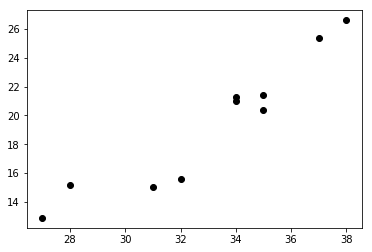

In [28]:
X = [35, 28, 32, 27, 37, 38, 34, 35, 34, 31]
y = [21.4, 15.2, 15.6, 12.9, 25.4, 26.6, 21.0, 20.4, 21.3, 15.0]
plt.scatter(X, y,  color='black');

In [29]:
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
res = model.resid
yhat = model.fittedvalues
model.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     68.68
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           3.38e-05
Time:                        10:42:31   Log-Likelihood:                -17.680
No. Observations:                  10   AIC:                             39.36
Df Residuals:                       8   BIC:                             39.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.7327      4.878     -4.250      0.003     -31.982      -9.484
x1             1.2149      0.147      8.287      0.000       0.877       1.553
==============================================================================
Omnibus:                        1.354   Durbin-Watson:                   2.591
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.953
Skew:                          -0.528   Prob(JB):                        0.621
Kurtosis:                       1.919   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

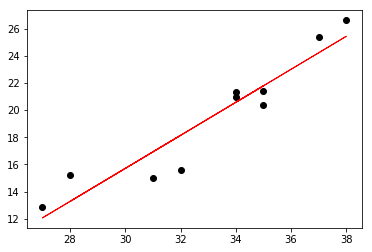

In [30]:
plt.scatter(X, y,  color='black')
plt.plot(X, yhat, color='red', linewidth=1);

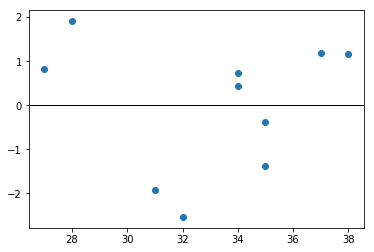

In [31]:
plt.scatter(X, res)
plt.axhline(y=0, color='k', linewidth=1)
plt.show()

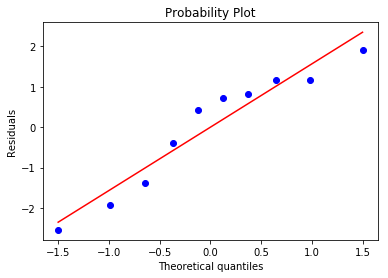

Skewness = -0.5285
Kurtosis = -1.0812


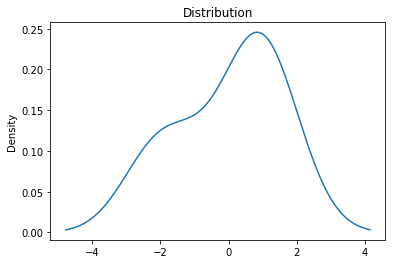

In [32]:
stats.probplot(res, plot=plt)
plt.ylabel('Residuals')
plt.show()
print('Skewness = ' + repr(round(stats.skew(res),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(res),4)))
df = pd.DataFrame(res)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution');

In [33]:
# b)
SSE = np.sum(res**2)
SST = np.sum((y-np.mean(y))**2)
SSR = SST-SSE
print("SSR =", round(SSR, 3))

SSR = 172.538


In [34]:
# c) see table above

In [35]:
# d)
print("R\u00B2 =", round(1-SSE/SST, 3))
print("R =", round(np.sqrt(1-SSE/SST), 3))

R² = 0.896
R = 0.946


In [36]:
# e)
X = np.asarray(X)
X = X.reshape(-1, 1)
lm = linear_model.LinearRegression()
model2 = lm.fit(X,y)
y30 = float(model2.predict(30))

n = len(X)
reserr = SSE/(n-2)
Sxx = np.sum((X-np.mean(X))**2)
SE = sqrt(reserr*(1+1/n+(30-np.mean(X))**2/Sxx))
crit = stats.t.ppf(0.975, n-2)

print('A 95 % prediction interval for X = 30 is [',round(y30-crit*SE, 3), ';', round(y30+crit*SE, 3), ']')

A 95 % prediction interval for X = 30 is [ 11.74 ; 19.688 ]


In [37]:
y30

15.713857998289132